In [409]:
import pandas as pd
import numpy as np
import pandas_datareader.data as wb

In [410]:
#importando dados

In [411]:
ativo = wb.get_data_yahoo('AUDJPY=X', start=2000)
ativo = ativo.drop(columns='Volume')
ativo = ativo.drop(columns='Adj Close')
ativo['MM10'] = ativo['Close'].rolling(10).mean()
ativo['MM20'] = ativo['Close'].rolling(20).mean()
ativo['MM100'] = ativo['Close'].rolling(100).mean()
ativo['MM200'] = ativo['Close'].rolling(200).mean()
ativo

,High,Low,Open,Close,MM10,MM20,MM100,MM200
Date,,,,,,,,
2003-12-01,79.739998,78.820000,79.338997,79.370003,NaN,NaN,NaN,NaN
2003-12-02,79.923103,79.272598,79.370003,79.610001,NaN,NaN,NaN,NaN
2003-12-03,79.812798,79.190002,79.589996,79.730003,NaN,NaN,NaN,NaN
2003-12-04,79.739998,79.110001,79.730003,79.570000,NaN,NaN,NaN,NaN
2003-12-05,79.650002,79.095200,79.589996,79.199997,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2020-12-29,78.949997,78.679001,78.679001,78.678001,78.4762,78.04440,76.351879,74.059735
2020-12-30,79.389999,78.748001,78.779999,78.805000,78.5270,78.13545,76.378839,74.121800
2020-12-31,79.785004,79.280403,79.290001,79.285004,78.6228,78.22730,76.406369,74.190770


In [412]:
ativo = round(ativo*1000)

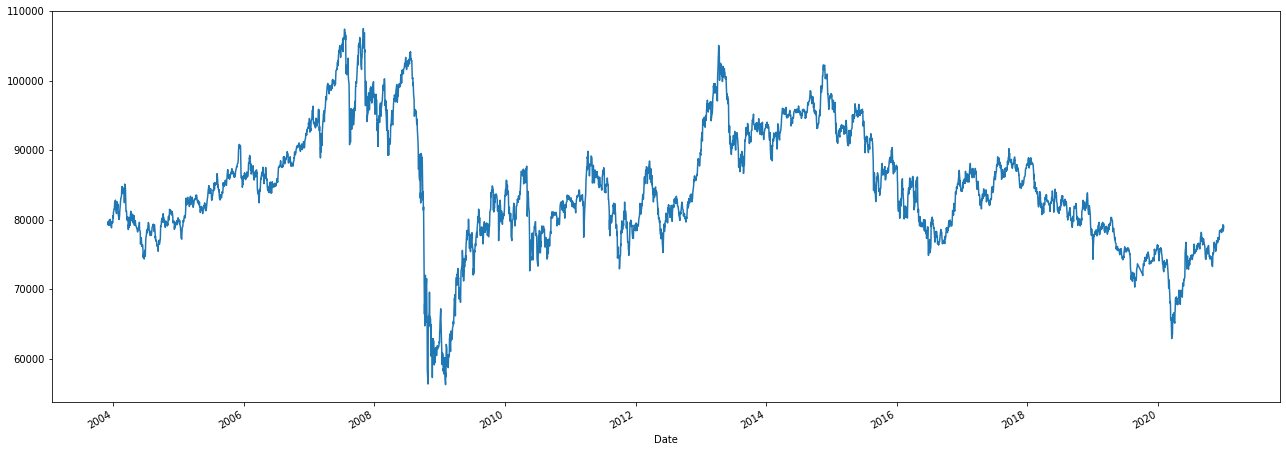

In [413]:
ativo['Close'].plot(figsize=(22,8))

In [414]:
resultado = []
for i in range(0, len(ativo)):
  if ativo['Close'][i] > ativo['Open'][i]:
    resultado.append(1)
  else:
    resultado.append(0)

In [415]:
resultado.pop(0)
resultado.append('Espera')
ativo['Resultado'] = resultado

In [416]:
ativo = ativo.dropna()
ativo['MM10'] = ativo['Close'] - ativo['MM10']
ativo['MM20'] = ativo['Close'] - ativo['MM20']
ativo['MM100'] = ativo['Close'] - ativo['MM100']
ativo['MM200'] = ativo['Close'] - ativo['MM200']
ativo

,High,Low,Open,Close,MM10,MM20,MM100,MM200,Resultado
Date,,,,,,,,,
2004-09-02,76576.0,75690.0,76282.0,76369.0,-681.0,-1678.0,-1669.0,-3274.0,0
2004-09-05,76430.0,75990.0,76420.0,76259.0,-601.0,-1645.0,-1733.0,-3368.0,0
2004-09-06,76391.0,75680.0,76291.0,75770.0,-931.0,-1959.0,-2182.0,-3838.0,1
2004-09-07,76300.0,75390.0,75793.0,76174.0,-378.0,-1409.0,-1744.0,-3416.0,0
2004-09-08,76177.0,75210.0,76156.0,75480.0,-914.0,-1921.0,-2390.0,-4090.0,1
...,...,...,...,...,...,...,...,...,...
2020-12-29,78950.0,78679.0,78679.0,78678.0,202.0,634.0,2326.0,4618.0,1
2020-12-30,79390.0,78748.0,78780.0,78805.0,278.0,670.0,2426.0,4683.0,0
2020-12-31,79785.0,79280.0,79290.0,79285.0,662.0,1058.0,2879.0,5094.0,1


In [417]:
previsores = ativo.iloc[:len(ativo)-1,0:8]
classe = ativo.iloc[:len(ativo)-1,8]
classe = classe.astype('int')

In [419]:
from sklearn.model_selection import train_test_split
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size=0.15, random_state=0)

In [420]:
from sklearn.naive_bayes import GaussianNB
classificador = GaussianNB()
classificador.fit(previsores_treinamento, classe_treinamento)
previsoes = classificador.predict(previsores_teste)

In [421]:
from sklearn.metrics import confusion_matrix, accuracy_score
precisao = accuracy_score(classe_teste, previsoes)
matriz = confusion_matrix(classe_teste, previsoes)

In [422]:
print(precisao)
print(matriz)

0.5228346456692914
[[176 135]
 [168 156]]


In [423]:
# Conclusão: 52,3%
#Péssimo